# image encryption and decryption

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Caesar cipher functions

In [24]:
def caesar_encrypt_pixel(pixel, shift):
    return (pixel + shift) % 256

def caesar_decrypt_pixel(pixel, shift):
    return (pixel - shift) % 256

### Load image and convert to grayscale

In [25]:
image_path = 'imgs/input_image.jpg'  
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image, dtype=np.uint8)

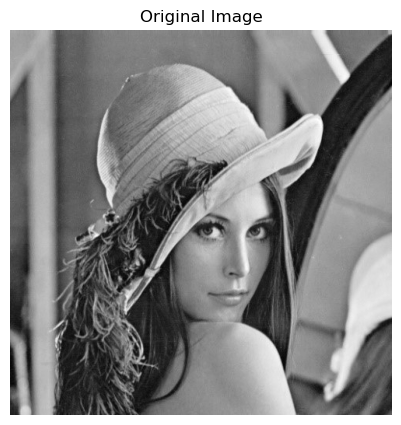

In [26]:
plt.figure(figsize=(5, 5))
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.savefig('imgs/original_image.png')
plt.show()

### Step 1: Confusion - Shuffle pixel positions


In [27]:
np.random.seed(42)  # For reproducibility
rows, cols = image_array.shape
flat_array = image_array.flatten()
shuffled_indices = np.random.permutation(len(flat_array))
confused_array = flat_array[shuffled_indices]
confused_image = confused_array.reshape(rows, cols)

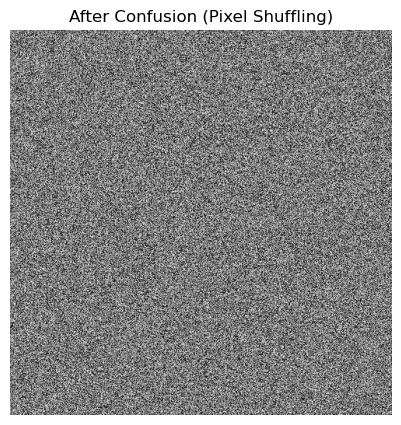

In [28]:
plt.figure(figsize=(5, 5))
plt.imshow(confused_image, cmap='gray')
plt.title('After Confusion (Pixel Shuffling)')
plt.axis('off')
plt.savefig('imgs/confused_image.png')
plt.show()

### Step 2: Diffusion - Apply Caesar cipher to pixel values

In [29]:
shift = 3
diffused_array = np.copy(confused_image).flatten()
for i in range(len(diffused_array)):
    diffused_array[i] = caesar_encrypt_pixel(diffused_array[i], shift)
diffused_image = diffused_array.reshape(rows, cols)

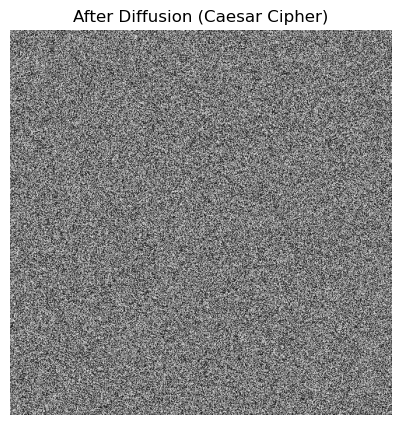

In [30]:
plt.figure(figsize=(5, 5))
plt.imshow(diffused_image, cmap='gray')
plt.title('After Diffusion (Caesar Cipher)')
plt.axis('off')
plt.savefig('imgs/diffused_image.png')
plt.show()

### Decoding: Reverse Diffusion

In [31]:
decoded_diffused_array = np.copy(diffused_image).flatten()
for i in range(len(decoded_diffused_array)):
    decoded_diffused_array[i] = caesar_decrypt_pixel(decoded_diffused_array[i], shift)
decoded_diffused_image = decoded_diffused_array.reshape(rows, cols)

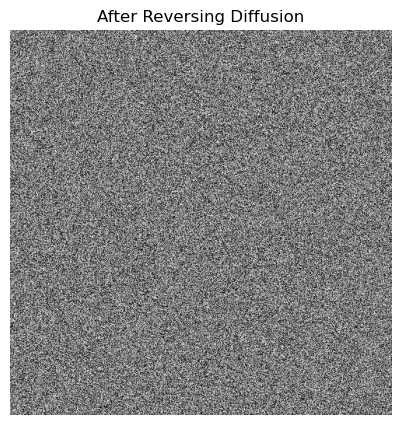

In [32]:
plt.figure(figsize=(5, 5))
plt.imshow(decoded_diffused_image, cmap='gray')
plt.title('After Reversing Diffusion')
plt.axis('off')
plt.savefig('imgs/decoded_diffused_image.png')
plt.show()

### Decoding: Reverse Confusion

In [33]:
inverse_indices = np.argsort(shuffled_indices)
decoded_array = decoded_diffused_array[inverse_indices]
decoded_image = decoded_array.reshape(rows, cols)

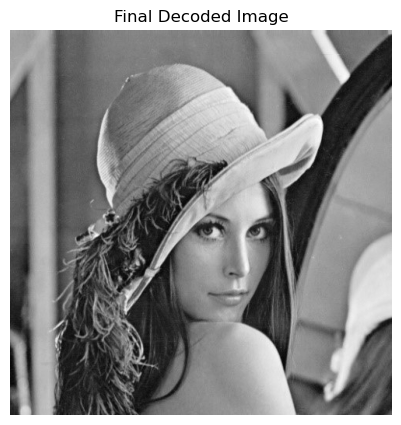

In [34]:
plt.figure(figsize=(5, 5))
plt.imshow(decoded_image, cmap='gray')
plt.title('Final Decoded Image')
plt.axis('off')
plt.savefig('imgs/decoded_image.png')
plt.show()